DataFrame shape: (200000, 19)


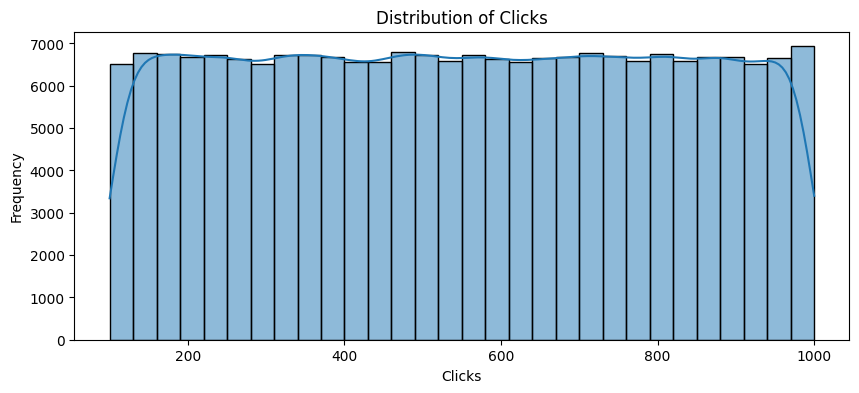

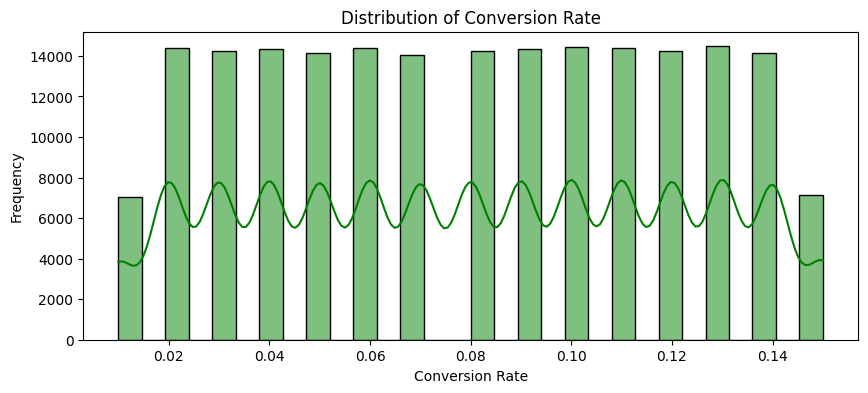

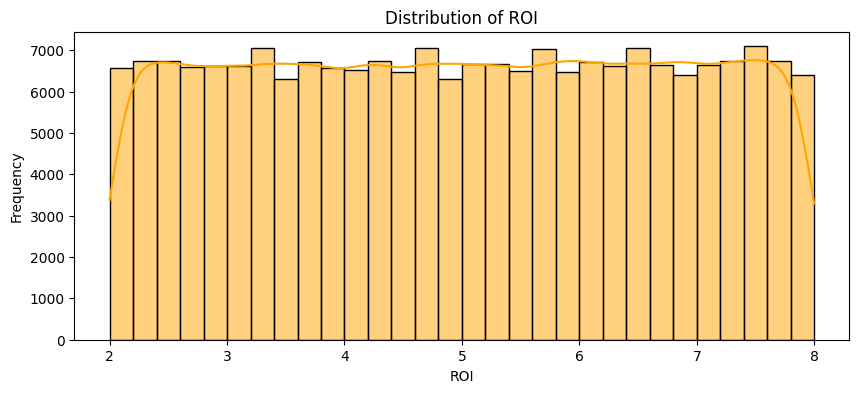

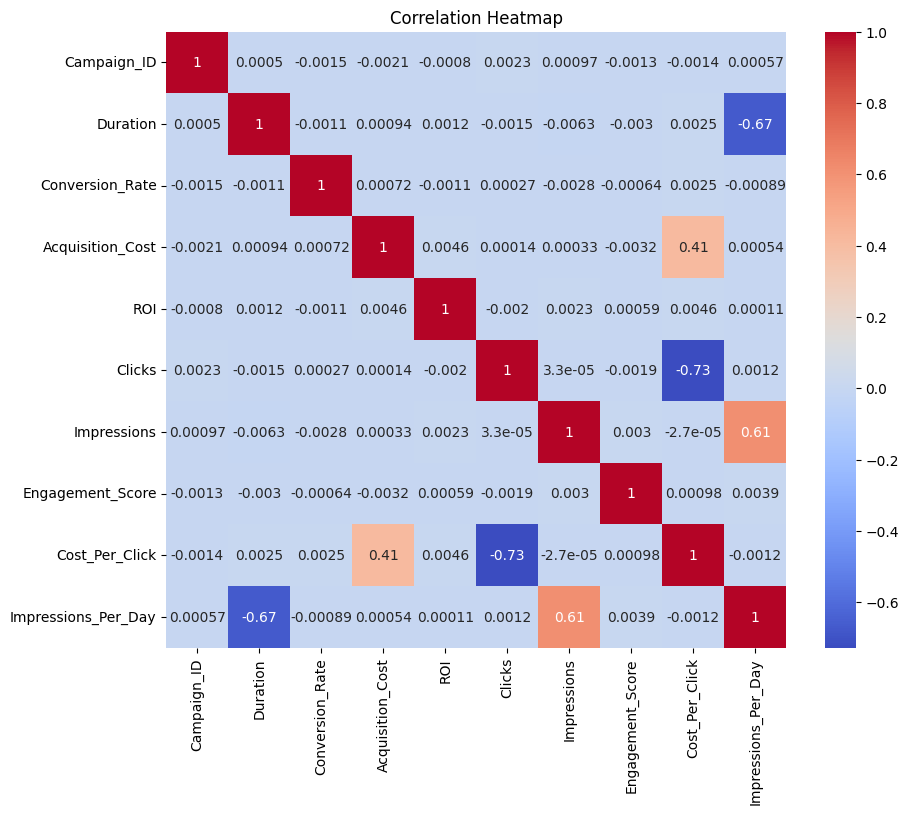

/var/folders/ql/hx835w2530n8fvqq5ffvn6mh0000gn/T/ipykernel_6076/2319695259.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Campaign_Type", y="ROI", estimator="mean", ci=None)


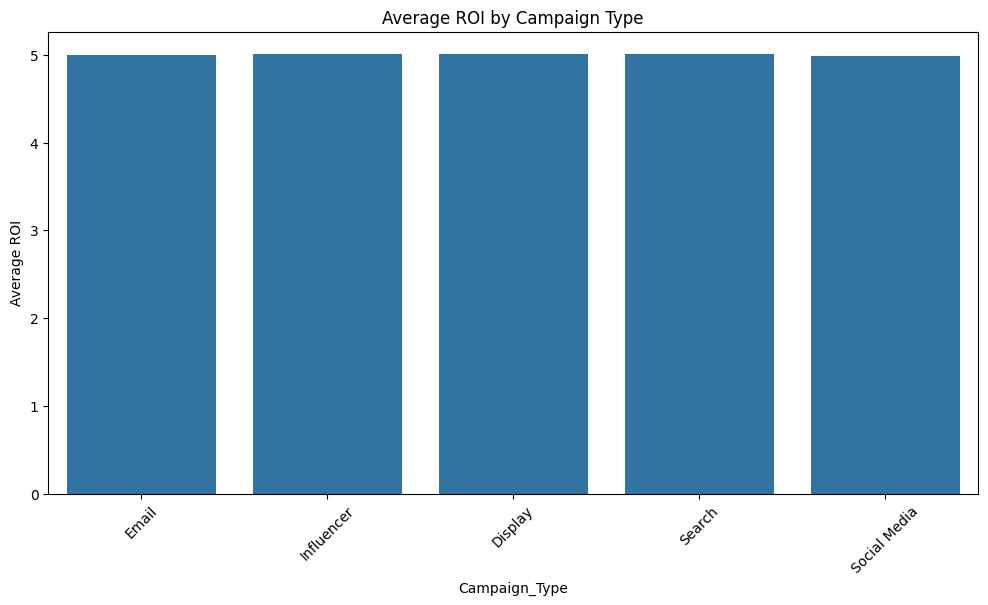

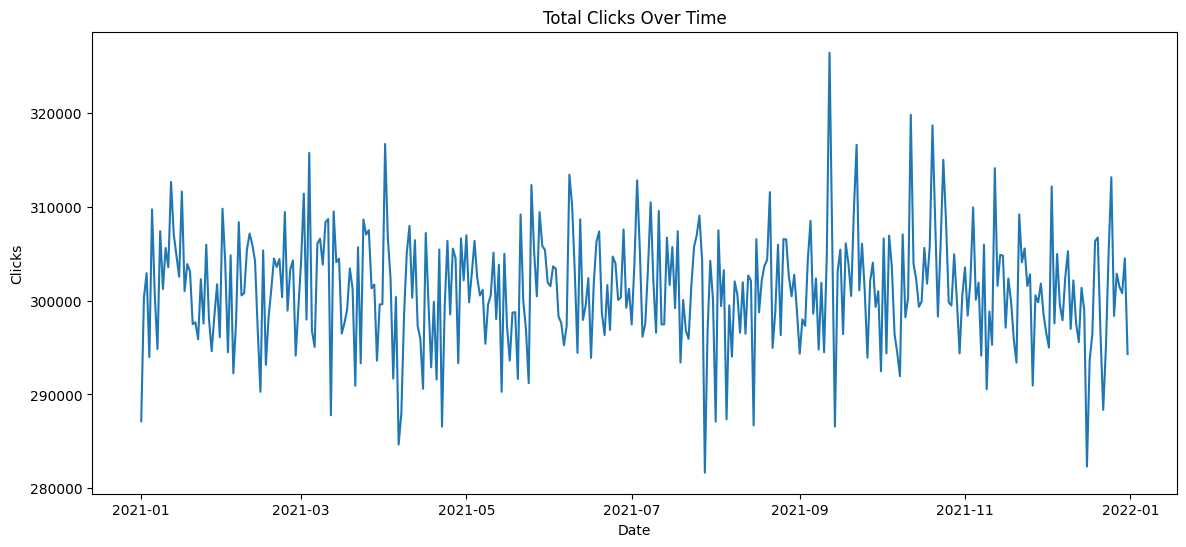

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

# ------------------ Connect to MongoDB ------------------ #
client = MongoClient("mongodb://localhost:27017")
db = client["pythia"]
collection = db["clean_campaigns"]

# ------------------ Load Data ------------------ #
data = list(collection.find())
df = pd.DataFrame(data)

# ------------------ Basic Info ------------------ #
print("DataFrame shape:", df.shape)
df.head()

# ------------------ Distribution Plots ------------------ #
plt.figure(figsize=(10, 4))
sns.histplot(df["Clicks"], kde=True, bins=30)
plt.title("Distribution of Clicks")
plt.xlabel("Clicks")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df["Conversion_Rate"], kde=True, bins=30, color="green")
plt.title("Distribution of Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df["ROI"], kde=True, bins=30, color="orange")
plt.title("Distribution of ROI")
plt.xlabel("ROI")
plt.ylabel("Frequency")
plt.show()

# ------------------ Correlation Heatmap ------------------ #
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ------------------ Grouped Barplot by Campaign Type ------------------ #
if "Campaign_Type" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x="Campaign_Type", y="ROI", estimator="mean", ci=None)
    plt.title("Average ROI by Campaign Type")
    plt.ylabel("Average ROI")
    plt.xticks(rotation=45)
    plt.show()

# ------------------ Time Series (if Date present) ------------------ #
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df_time = df.dropna(subset=["Date"]).copy()
    df_time = df_time.groupby("Date")["Clicks"].sum().reset_index()

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_time, x="Date", y="Clicks")
    plt.title("Total Clicks Over Time")
    plt.xlabel("Date")
    plt.ylabel("Clicks")
    plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Διαχωρισμός δεδομένων
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Εκπαίδευση γραμμικού μοντέλου
lr = LinearRegression()
lr.fit(X_train, y_train)
# Πρόβλεψη & αξιολόγηση
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
